
# Deep Learning for Image Classification Assessment
# SOLUTION


## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [73]:
import sys 
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [74]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

In [75]:
# Importing the Keras libraries and downloading the fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # loading the data from the MNIST dataset

## Visualizing the Data

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

In [77]:
x_train[0] # First image in the training set

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [78]:
x_train[0].shape 

(28, 28)

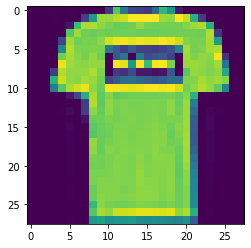

In [79]:
plt.imshow(x_train[1]) 

In [80]:
y_train[1]

0

In [81]:
classes[0]

'T-shirt/top'

## Preprocessing the Data

In [82]:
x_train.max()

255

In [83]:
x_train = x_train/255

In [84]:
x_test = x_test/255

Task 4: 

In [85]:
x_train.shape

(60000, 28, 28)

In [86]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0],28,28,1) 

In [87]:
x_test = x_test.reshape(10000,28,28,1)

TASK 5: 

In [88]:
from tensorflow.keras.utils import to_categorical 

In [89]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [90]:
y_cat_train = to_categorical(y_train)

In [91]:
y_cat_test = to_categorical(y_test)

In [92]:
y_cat_train 

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Training the Model
TASK 6:

In [94]:
# Creating a CNN Model

# Initialize the model
model = Sequential() 

# 1st Convolutional Layer with 28 filters and 3x3 kernel size to extract features from the image
model.add(Conv2D(filters=28, kernel_size=(3,3),
                 input_shape=(28, 28, 1), 
                 activation='relu',)) 

# MaxPooling Layer to reduce the size of the image
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))

# Flattening the 2D arrays for fully connected layers to 1D
model.add(Flatten()) 

# 1st Fully Connected Layer 
model.add(Dense(256, activation='relu'))
# Dropout for regularization to prevent overfitting
model.add(Dropout(0.4)) 

# Output Layer with 10 neurons to predict the output class
model.add(Dense(10, activation='softmax')) 

# Compiling the CNN model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

In [95]:
from tensorflow.keras.callbacks import EarlyStopping 

In [96]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3, restore_best_weights=True) # to stop training if validation accuracy does not increase after 3 epochs

In [97]:
# Training the CNN Model
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1, 
          callbacks = [early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4092 - accuracy: 0.8572 - val_loss: 0.3241 - val_accuracy: 0.8874
Epoch 2/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2969 - accuracy: 0.8972 - val_loss: 0.3007 - val_accuracy: 0.8978
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2810 - accuracy: 0.9042 - val_loss: 0.3014 - val_accuracy: 0.8950
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2745 - accuracy: 0.9068 - val_loss: 0.3121 - val_accuracy: 0.8968
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2698 - accuracy: 0.9099 - val_loss: 0.3117 - val_accuracy: 0.8946


In [98]:
loss_df = pd.DataFrame(model.history.history) # history contains logs of each epoch
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.409204,0.857167,0.324103,0.8874
1,0.296934,0.897217,0.300697,0.8978
2,0.280961,0.904183,0.301398,0.8950
3,0.274489,0.906783,0.312145,0.8968
4,0.269796,0.909883,0.311709,0.8946


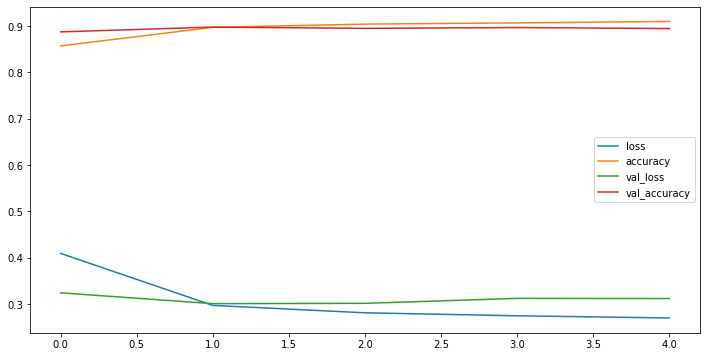

In [99]:
loss_df.plot(figsize = (12,6)); # to plot the loss vs epochs

### Evaluating the Model


In [100]:
model.metrics_names

['loss', 'accuracy']

In [101]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3007 - accuracy: 0.8978


[0.30069682002067566, 0.8978000283241272]

In [102]:
from sklearn.metrics import classification_report

In [154]:
predictions = model.predict(x_test)
predictions

array([[3.34e-06, 6.75e-07, 1.03e-05, ..., 1.88e-03, 4.03e-05, 9.97e-01],
       [1.78e-06, 2.25e-12, 1.00e+00, ..., 8.37e-13, 1.17e-09, 2.41e-12],
       [3.49e-09, 1.00e+00, 1.35e-10, ..., 1.26e-11, 5.39e-11, 4.46e-12],
       ...,
       [1.02e-06, 1.29e-13, 1.52e-07, ..., 2.40e-09, 1.00e+00, 2.08e-11],
       [9.66e-09, 1.00e+00, 5.10e-10, ..., 2.15e-10, 8.69e-10, 1.23e-09],
       [1.47e-02, 2.34e-03, 5.52e-02, ..., 4.17e-02, 1.51e-01, 1.75e-02]],
      dtype=float32)

In [147]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [105]:
y_cat_test.shape

(10000, 10)

In [106]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [107]:
np.argmax(predictions[0])

9

In [108]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [109]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.86      0.94      0.89      1000
           4       0.82      0.87      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.69      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [110]:
classes[6]

'Shirt'

## Prediction

In [111]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

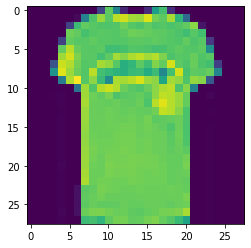

In [112]:
plt.imshow(samples[0])

In [113]:
samples[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.20392157],
        [0.75294118],
        [0.45098039],
        [0.10588235],
        [0.00392157],
        [0.00392157],
        [0.12156863],
        [0.56078431],
        [0.70196078],
        [0.1254902 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01960784],
        [0.44313725],
        [0.7254902 ],
        [0.84705882],
        [0.74509804],
        [0.89803922],
        [0.92941176],
        [0.8627451 ],
        [0.85098039],
        [0.94901961],
        [0.78823529],
        

In [114]:
img=samples[0]
img.shape

(28, 28, 1)

In [115]:
type(img)

numpy.ndarray

In [116]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [117]:
model.predict(resized_img)

array([[9.3965083e-01, 5.6611981e-07, 1.6366825e-03, 2.5864965e-03,
        8.5765259e-06, 5.1027814e-06, 5.5999767e-02, 1.5839150e-05,
        9.5746669e-05, 3.3540050e-07]], dtype=float32)

In [118]:
np.argmax(model.predict(resized_img))

0

In [119]:
classes[0]

'T-shirt/top'

In [120]:
for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")
    

T-shirt/top    0.940
Trouser        0.000
Pullover       0.002
Dress          0.003
Coat           0.000
Sandal         0.000
Shirt          0.056
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top    0.0
Trouser        1.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Trouser

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.210
Shirt          0.000
Sneaker        0.033
Bag            0.756
Ankle boot     0.000
dtype: float32
predicted class is : Bag

T-shirt/top    0.000
Trouser        0.000
Pullover       0.032
Dress          0.000
Coat           0.947
Sandal         0.000
Shirt          0.021
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Coat



# real life photo

(91, 150, 3)


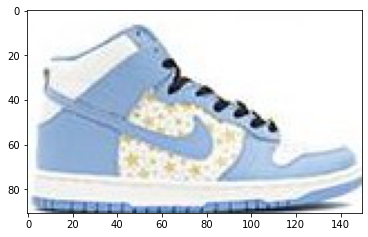

In [121]:
from tensorflow.keras.preprocessing import image
imgGray = image.load_img("test5.jpg",)# target_size=(28, 28))
print (np.array(imgGray).shape)
plt.imshow(imgGray)


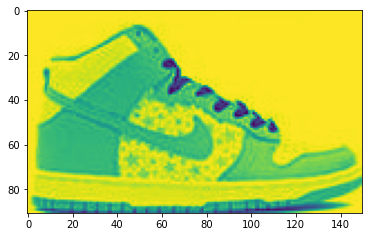

In [122]:
import tensorflow as tf
imgGray = tf.image.rgb_to_grayscale(imgGray)
plt.imshow(imgGray)

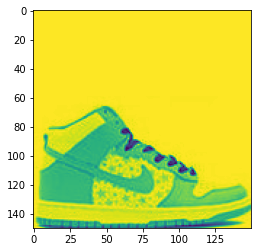

In [123]:
# We add some pixels top of the image to make it square. in order to get a imagage like model trained on MNIST(If not needed can be skipped)
bg_adding = (np.ones(((150-91),150))*255).reshape((150-91),150,1) # adding white background
plt.imshow(np.concatenate ((bg_adding,imgGray), axis=0)) 
imgGray =  np.concatenate ((bg_adding,imgGray), axis=0) # concatenating the background and the image


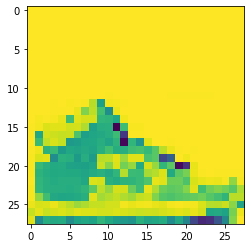

In [124]:
size = (28, 28)
plt.imshow(tf.image.resize(imgGray, size))
imgGray = tf.image.resize(imgGray, size) # resizing the image to 28x28 pixels

In [125]:
imgGray.shape

TensorShape([28, 28, 1])

In [126]:
imgGray = np.array(imgGray)
imgGray.shape

(28, 28, 1)

In [127]:
imgGray[:,:,0]

array([[255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      ],
       [255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      ],
       [255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.      , 255.      , 255.      , 255.      ,
        255.      , 255.  

In [128]:
# to convert background into black
height, width,_ = imgGray.shape

for i in range(height):
    for j in range(width):
        # img[i,j] is the grayscale pixel at position (i, j)
        # check if it's [255] and replace with [0] if so
        if imgGray[i,j] > 250:
            imgGray[i, j] = 0 

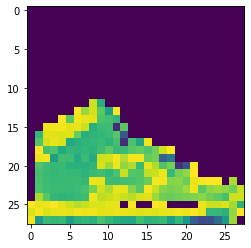

In [129]:
plt.imshow(imgGray)
    

In [130]:
np.array(imgGray).min(), np.array(imgGray).max() # to check the min and max values of the image

(0.0, 249.4758)

In [131]:
imgGray = imgGray/255 # normalizing the image
imgGray.shape

(28, 28, 1)

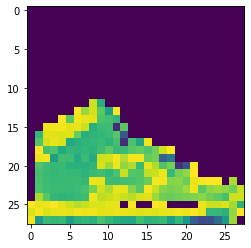

In [132]:
plt.imshow(imgGray)

In [133]:
imgGray= np.expand_dims(imgGray, axis=0)
imgGray.shape

(1, 28, 28, 1)

In [134]:
# imgGray = imgGray[None,:,:,:] # same process to add dimension without a function
# imgGray.shape

In [135]:
model.predict(imgGray).round(3).flatten() # to predict the class of the image

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.985, 0.   , 0.   , 0.015,
       0.   ], dtype=float32)

In [136]:
pd.Series(model.predict(imgGray).round(3).flatten())#.argmax()

0    0.000
1    0.000
2    0.000
3    0.000
4    0.000
5    0.985
6    0.000
7    0.000
8    0.015
9    0.000
dtype: float32

In [137]:
pd.Series(classes)

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object